<a href="https://colab.research.google.com/github/Vicky16032205/Vicky16032205/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.7 MB/s eta 0:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

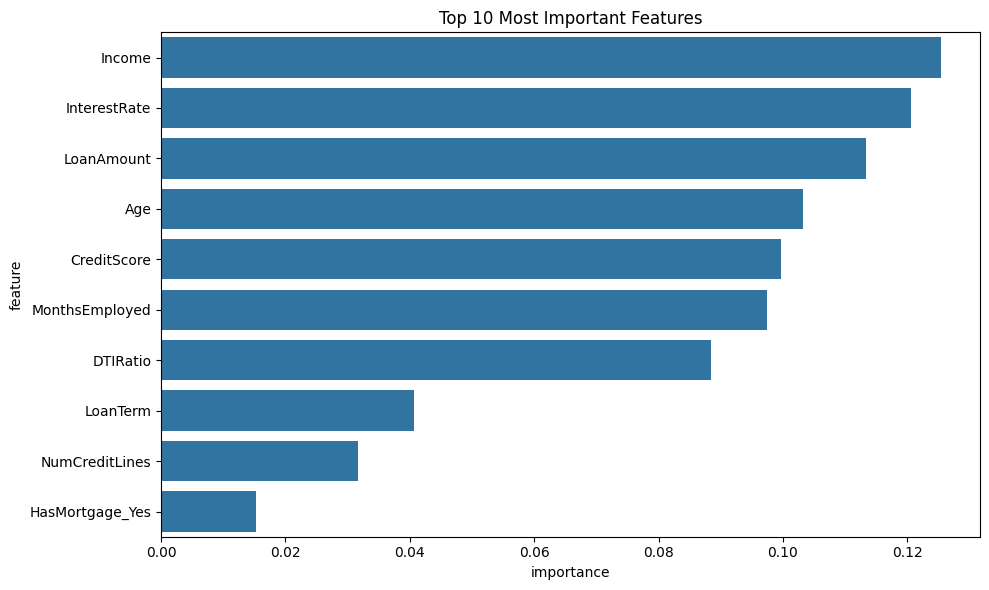


Loan Application Result:
Eligible for a loan

Advice:
Congratulations! Based on our model, you are eligible for a loan. The probability of approval is 0.10.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_ssplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U scikit-learn

try:

    df = pd.read_csv('/content/Loan_default.csv')
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check the file path.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: The dataset file is empty.")
    exit()
except pd.errors.ParserError:
    print("Error: Unable to parse the dataset file. Please check if it's a valid CSV.")
    exit()

print(df.info())
print("\nSample data:")
print(df.head())

missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)

if missing_values.sum() > 0:
    print("Warning: The dataset contains missing values. They will be handled in the preprocessing step.")

df = df.dropna()

print("\nColumn types:")
print(df.dtypes)

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()

if 'Default' in numeric_columns:
    numeric_columns.remove('Default')
if 'LoanID' in categorical_columns:
    categorical_columns.remove('LoanID')

print("\nNumeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)


if 'Default' in df.columns:
    X = df.drop(['Default', 'LoanID'], axis=1, errors='ignore')
    y = df['Default']
else:
    print("Error: Default column not found in the dataset.")
    exit()


for col in numeric_columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

for col in categorical_columns:
    X[col] = X[col].astype(str)

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

try:
    model.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred during model fitting: {str(e)}")
    print("X_train dtypes:")
    print(X_train.dtypes)
    print("\nX_train head:")
    print(X_train.head())
    exit()

y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

feature_names = (numeric_columns +
                 model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_columns).tolist())

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': model.named_steps['classifier'].feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

def get_loan_advice(applicant_data):

    applicant_df = pd.DataFrame([applicant_data])


    if 'LoanID' in applicant_df.columns:
        applicant_df = applicant_df.drop('LoanID', axis=1)


    for col in numeric_columns:
        if col in applicant_df.columns:
            applicant_df[col] = pd.to_numeric(applicant_df[col], errors='coerce')

    for col in categorical_columns:
        if col in applicant_df.columns:
            applicant_df[col] = applicant_df[col].astype(str)


    try:
        prediction = model.predict(applicant_df)
        probability = model.predict_proba(applicant_df)[0][1]
    except Exception as e:
        print(f"An error occurred during prediction: {str(e)}")
        print("applicant_df dtypes:")
        print(applicant_df.dtypes)
        print("\napplicant_df:")
        print(applicant_df)
        raise


    if prediction[0] == 0:
        result = "Eligible for a loan"
        advice = f"Congratulations! Based on our model, you are eligible for a loan. The probability of approval is {probability:.2f}."
    else:
        result = "Not eligible for a loan"
        advice = f"We're sorry, but based on our model, you may not be eligible for a loan at this time. The probability of approval is {probability:.2f}."


    if 'CreditScore' in applicant_data and applicant_data['CreditScore'] < 650:
        advice += "\nYou may want to focus on improving your credit score to increase your chances of loan approval."
    if 'DTIRatio' in applicant_data and applicant_data['DTIRatio'] > 0.43:
        advice += "\nYour debt-to-income ratio is high. Consider reducing your debt or increasing your income to improve your loan eligibility."

    return result, advice


example_applicant = {
    'Age': 35,
    'Income': 60000,
    'LoanAmount': 200000,
    'CreditScore': 720,
    'MonthsEmployed': 60,
    'NumCreditLines': 3,
    'InterestRate': 4.5,
    'LoanTerm': 360,
    'DTIRatio': 0.3,
    'Education': 'Bachelor',
    'EmploymentType': 'FullTime',
    'MaritalStatus': 'Married',
    'HasMortgage': 0,
    'HasDependents': 1,
    'LoanPurpose': 'HomeImprovement',
    'HasCoSigner': 0
}

try:
    result, advice = get_loan_advice(example_applicant)
    print("\nLoan Application Result:")
    print(result)
    print("\nAdvice:")
    print(advice)
except Exception as e:
    print(f"An error occurred while processing the loan application: {str(e)}")

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.graph_objects as go
import plotly.express as px

st.set_page_config(page_title="LoanWise Advisor", page_icon="💰", layout="wide")

st.markdown("""
<style>
    .reportview-container {
        background: #f0f2f6
    }
    .big-font {
        font-size:20px !important;
        font-weight: bold;
    }
</style>
""", unsafe_allow_html=True)

@st.cache_data
def generate_dummy_data(n=1000):
    np.random.seed(42)
    data = pd.DataFrame({
        'LoanID': range(1, n+1),
        'Age': np.random.randint(18, 70, n),
        'Income': np.random.randint(20000, 200000, n),
        'LoanAmount': np.random.randint(5000, 500000, n),
        'CreditScore': np.random.randint(300, 850, n),
        'MonthsEmployed': np.random.randint(0, 480, n),
        'NumCreditLines': np.random.randint(0, 20, n),
        'InterestRate': np.random.uniform(2, 15, n),
        'LoanTerm': np.random.choice([12, 36, 60, 120, 180, 240, 360], n),
        'DTIRatio': np.random.uniform(0, 0.6, n),
        'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n),
        'EmploymentType': np.random.choice(['Full-time', 'Part-time', 'Self-employed', 'Unemployed'], n),
        'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], n),
        'HasMortgage': np.random.choice([0, 1], n),
        'HasDependents': np.random.choice([0, 1], n),
        'LoanPurpose': np.random.choice(['Home', 'Auto', 'Business', 'Education', 'Personal'], n),
        'HasCoSigner': np.random.choice([0, 1], n),
        'Default': np.random.choice([0, 1], n, p=[0.7, 0.3])
    })
    return data

@st.cache_resource
def train_model():
    data = generate_dummy_data()
    X = data.drop(['LoanID', 'Default', 'InterestRate'], axis=1)
    y = data['Default']


    numeric_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'LoanTerm', 'DTIRatio']
    numeric_transformer = StandardScaler()


    categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

    model.fit(X, y)
    return model

model = train_model()

st.sidebar.title("Your Loan Application")

age = st.sidebar.number_input('Age', min_value=18, max_value=100, value=30)
income = st.sidebar.number_input('Annual Income ($)', min_value=0, max_value=1000000, value=50000)
loan_amount = st.sidebar.number_input('Desired Loan Amount ($)', min_value=1000, max_value=1000000, value=100000)
credit_score = st.sidebar.slider('Credit Score', 300, 850, 650)
months_employed = st.sidebar.number_input('Months Employed', min_value=0, max_value=600, value=60)
num_credit_lines = st.sidebar.number_input('Number of Credit Lines', min_value=0, max_value=30, value=3)
loan_term = st.sidebar.selectbox('Loan Term (Months)', [12, 36, 60, 120, 180, 240, 360])
dti_ratio = st.sidebar.slider('Debt-to-Income Ratio', 0.0, 1.0, 0.3, format="%.2f")
education = st.sidebar.selectbox('Education', ['High School', 'Bachelor', 'Master', 'PhD'])
employment_type = st.sidebar.selectbox('Employment Type', ['Full-time', 'Part-time', 'Self-employed', 'Unemployed'])
marital_status = st.sidebar.selectbox('Marital Status', ['Single', 'Married', 'Divorced'])
has_mortgage = st.sidebar.checkbox('Has Mortgage')
has_dependents = st.sidebar.checkbox('Has Dependents')
loan_purpose = st.sidebar.selectbox('Loan Purpose', ['Home', 'Auto', 'Business', 'Education', 'Personal'])
has_cosigner = st.sidebar.checkbox('Has Co-Signer')


st.title("🏦 LoanWise Advisor")
st.markdown("Your comprehensive guide to loan eligibility and financial planning")

user_data = pd.DataFrame({
    'Age': [age],
    'Income': [income],
    'LoanAmount': [loan_amount],
    'CreditScore': [credit_score],
    'MonthsEmployed': [months_employed],
    'NumCreditLines': [num_credit_lines],
    'LoanTerm': [loan_term],
    'DTIRatio': [dti_ratio],
    'Education': [education],
    'EmploymentType': [employment_type],
    'MaritalStatus': [marital_status],
    'HasMortgage': [int(has_mortgage)],
    'HasDependents': [int(has_dependents)],
    'LoanPurpose': [loan_purpose],
    'HasCoSigner': [int(has_cosigner)]
})

probability = model.predict_proba(user_data)[0][1]
eligibility= "High Risk" if probability > 0.5 else "Low Risk"

st.header("🎯 Loan Risk Assessment")
col1, col2, col3 = st.columns(3)
with col1:
    st.metric("Risk Status", eligibility, delta=None, delta_color="inverse")
with col2:
    st.metric("Default Probability", f"{probability:.2%}", delta=None, delta_color="inverse")
with col3:

    base_rate = 5.0
    risk_premium = probability * 10
    estimated_rate = base_rate + risk_premium
    st.metric("Estimated Interest Rate", f"{estimated_rate:.2f}%", delta=None, delta_color="normal")


st.header("💡 Personalized Financial Advice")
advice = []
if credit_score < 700:
   advice.append("Work on improving your credit score to reduce loan risk and potentially get better terms.")
if dti_ratio > 0.4:
    advice.append("Consider reducing your debt-to-income ratio to improve your financial health.")
if months_employed < 24:
    advice.append("A longer employment history can improve your loan prospects.")
if not has_cosigner and probability > 0.3:
    advice.append("Consider getting a co-signer to potentially reduce your loan risk.")
if num_credit_lines > 10:
    advice.append("Having many credit lines might be seen as a risk. Consider consolidating some of your credit.")
if not advice:
    advice.append("Great job! Your financial profile looks strong. Keep maintaining your good habits.")

for tip in advice:
    st.info(tip)


st.header("💰 Loan Repayment Simulator")
monthly_payment = loan_amount * (estimated_rate/100/12) / (1- (1 + estimated_rate/100/12)**(-loan_term))

col1, col2 = st.columns(2)
with col1:
    st.metric("Estimated Monthly Payment", f"${monthly_payment:.2f}", delta=None, delta_color="normal")
with col2:
    total_interest = monthly_payment * loan_term - loan_amount
    st.metric("Total Interest Paid", f"${total_interest:.2f}", delta=None, delta_color="normal")


fig = go.Figure(data=[go.Pie(labels=['Principal', 'Total Interest'],
                             values=[loan_amount, total_interest],
                             hole=.3)])
fig.update_layout(title_text="Loan Breakdown")
st.plotly_chart(fig)

st.header("📊 Credit Score Analysis")
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = credit_score,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Credit Score"},
    gauge = {
        'axis': {'range': [300, 850]},
        'bar': {'color': "darkblue"},
        'steps' : [
            {'range': [300, 580], 'color': "red"},
            {'range': [580, 670], 'color': "orange"},
            {'range': [670, 740], 'color': "yellow"},
            {'range': [740, 800], 'color': "lightgreen"},
            {'range': [800, 850], 'color': "green"}],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': credit_score}}))
st.plotly_chart(fig)

st.header("📈 Financial Overview Dashboard")
col1, col2, col3 = st.columns(3)
with col1:
    st.metric("Annual Income", f"${income:,}", delta=None, delta_color="normal")
    st.metric("Credit Score", credit_score, delta=None, delta_color="normal")
    st.metric("Loan Term", f"{loan_term} months", delta=None, delta_color="normal")
with col2:
    st.metric("Loan Amount", f"${loan_amount:,}", delta=None, delta_color="normal")
    st.metric("Debt-to-Income Ratio", f"{dti_ratio:.2%}", delta=None, delta_color="normal")
    st.metric("Employment Duration", f"{months_employed} months", delta=None, delta_color="normal")
with col3:
    st.metric("Number of Credit Lines", num_credit_lines, delta=None, delta_color="normal")
    st.metric("Estimated Monthly Payment", f"${monthly_payment:.2f}", delta=None, delta_color="normal")
    st.metric("Education Level", education, delta=None, delta_color="normal")

st.markdown("---")
st.markdown("*Note: This is a simplified model for demonstration purposes. Actual loan decisions involve many more factors and complex calculations.*")

Writing app.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.75.215.255


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.215.255:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) y
your url is: https://long-buses-swim.loca.lt
